In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.optimize as opt
%matplotlib inline

In [5]:
df=pd.read_csv('cancer_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

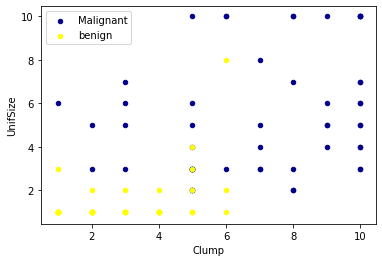

In [17]:
ax=df[df['Class']==4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Darkblue',label='Malignant')
df[df['Class']==2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='yellow',label='benign',ax=ax)
plt.show()

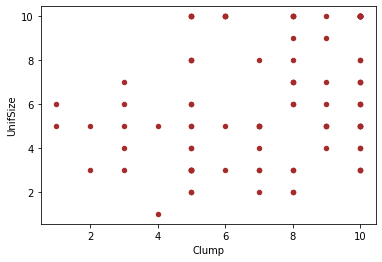

In [23]:
df[df['Class']==4][0:100].plot(kind='scatter',x='Clump',y='UnifSize',color='brown')
plt.show()

In [25]:
x=df.drop('ID',axis=1)

In [26]:
x.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [28]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [30]:
x=df.drop(df.columns[[0,10]], axis=1)
x.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [31]:
y=df['Class']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(546, 9) (546,) (137, 9) (137,)


In [34]:
from sklearn import svm
#classifier default kernal is rbf
clf=svm.SVC(gamma='auto')
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
yhat=clf.predict(x_test)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [38]:
confusion_matrix(y_test,yhat)

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [45]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,average='weighted')

0.9305165637282425